In [27]:
import pandas as pd

In [28]:
filename = r'D:\\arima\\byday_2.csv'

data = pd.read_csv(filename, index_col = u'DateTime')

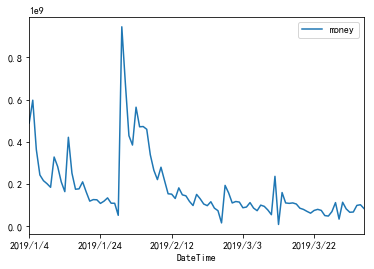

In [29]:
#画出时序图
import matplotlib.pyplot as plt     
plt.rcParams['font.sans-serif'] = ['SimHei']    #定义使其正常显示中文字体黑体
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示表示负号
data.plot()
plt.show()

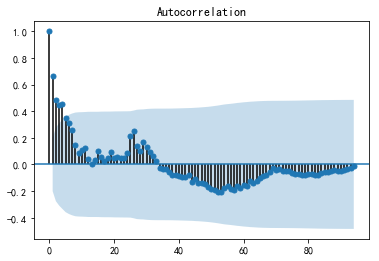

In [30]:
#画出自相关性图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

In [31]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data[u'money']))

原始序列的检验结果为： (-2.3159830002361144, 0.1668649389782047, 3, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, 3273.0942753685104)


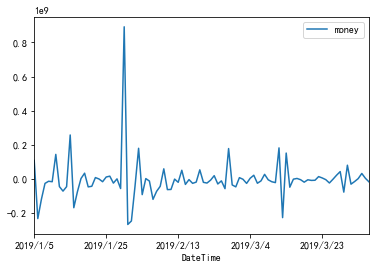

In [32]:
#对数据进行差分后得到 自相关图和 偏相关图
D_data = data.diff().dropna()
D_data.columns = [u'money']
 
D_data.plot()   #画出差分后的时序图
plt.show()
 



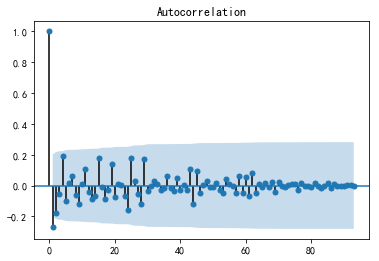

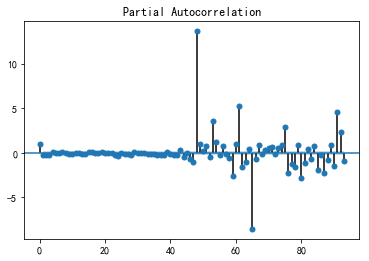

差分序列的ADF 检验结果为：  (-8.698517221294086, 3.8657834367620454e-14, 2, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, 3236.0013473681634)


In [36]:
plot_acf(D_data)    #画出自相关图
plt.show()
plot_pacf(D_data)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data[u'money']))   #平稳性检验

In [37]:

#对差分后的序列做白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 1)) #返回统计量和 p 值


差分序列的白噪声检验结果： (array([7.15908482]), array([0.00745852]))


In [38]:
#对模型进行定阶
from statsmodels.tsa.arima_model import ARIMA 
 
pmax = int(len(D_data) / 10)    #一般阶数不超过 length /10
qmax = int(len(D_data) / 10)
bic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(ARIMA(data, (p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)
 
bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1



E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodel

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodel

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, b

BIC 最小的p值 和 q 值：0,1


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [39]:
#可以建立ARIMA 模型，ARIMA(0,1,1)
model = ARIMA(data, (p,1,q)).fit()
model.summary2()        #生成一份模型报告



E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: ARIMA
===================================================================================
Model:                  ARIMA                BIC:                     3767.3693    
Dependent Variable:     D.money              Log-Likelihood:          -1876.9      
Date:                   2019-06-13 11:46     Scale:                   1.0000       
No. Observations:       94                   Method:                  css-mle      
Df Model:               2                    Sample:                  1            
Df Residuals:           92                                            5            
Converged:              1.0000               S.D. of innovations:     113389418.055
No. Iterations:         2.0000               HQIC:                    3762.821     
AIC:                    3759.7394                                                  
-----------------------------------------------------------------------------------
                  Coef.       Std.Err.      t    P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
const         -4306306.3830 6097770.2364 -0.7062 0.4818 -16257716.4324 7645103.6665
ma.L1.D.money       -0.4843       0.1048 -4.6225 0.0000        -0.6897      -0.2790
-------------------------------------------------------------------------------------------------
                      Real                Imaginary               Modulus               Frequency
-------------------------------------------------------------------------------------------------
MA.1                 2.0647                  0.0000                2.0647                  0.0000
===================================================================================

"""

In [40]:
f = model.forecast(5)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间

In [41]:
f

(array([80637951.5359302 , 76331645.15295148, 72025338.76997276,
        67719032.38699403, 63412726.00401531]),
 array([1.13389418e+08, 1.27577235e+08, 1.40337954e+08, 1.52031352e+08,
        1.62887454e+08]),
 array([[-1.41601224e+08,  3.02877127e+08],
        [-1.73715140e+08,  3.26378430e+08],
        [-2.03031997e+08,  3.47082675e+08],
        [-2.30256942e+08,  3.65695007e+08],
        [-2.55840817e+08,  3.82666269e+08]]))

In [14]:
file = open('D:\\arima\\result.txt','a')

In [15]:
file.writelines(str(f)+'\n') 